In [1]:
pip install fake-useragent

In [2]:
from fake_useragent import UserAgent
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm 
import re
import urllib

In [3]:
from urllib.request import Request, urlopen

req = Request('https://ficbook.net/fanfiction', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
soup = BeautifulSoup(webpage, 'html.parser')
items = soup.find_all("a", attrs={ "data-toggle" : "tooltip"})
tags = [item.get('href') for item in items]

In [4]:
def get_object(href):
    h = href.split('?')[0]
    req = Request('https://ficbook.net'+str(h), headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, 'lxml')
    name = soup.find("div", attrs={"class":"fanfic-main-info"}).find("h1", attrs={"class":"mb-10"}).text.strip()
    fandoms = [item.string.strip() for item in soup.find("div", attrs={"class":"mb-10"}).find_all("a", attrs={"class":"js-open-notification-modal"})]
    author = [item.string.strip() for item in soup.find_all("a", attrs={"class": "creator-nickname"})]
    pairing = [item.string.strip() for item in soup.find("div").find_all("a", attrs={"class":"js-open-notification-modal pairing-link pairing-highlight"})]
    categories = [item.string.strip() for item in soup.find("div", attrs={"class":"tags"}).find_all("a", attrs={"data-toggle":"tooltip"})]
    cat18 = [item.text for item in soup.find("div", attrs={"class":"tags"}).find_all("a", attrs={"class":"tag js-open-notification-modal tag-adult"})]
    badge = [item.string for item in soup.find_all("span", attrs={"class":"badge-text"})]
    likes = soup.find("span", attrs={"data-toggle":"modal"}).find("span", attrs={"class":"main-info"}).text.strip()
    feedback = soup.find("a", attrs={"class":"btn btn-primary btn-with-description"}).find("span", attrs={"class":"main-info"}).text.strip()
    if feedback == '':
        feedback = 0
    coll = soup.find("span", attrs={"onclick":"ym(199955, 'reachGoal', 'opened-modal-to-add-fic-to-collection-from-fic-header'); return true;"}).find("span", attrs={"class":"main-info"}).text.strip()
    desc = soup.find("div", attrs={"itemprop":"description"}).text
    size = soup.find("strong", text = 'Размер:').next_sibling.next_sibling.text.strip()
    to = None
    try:
        to = soup.find("strong", text = 'Посвящение:').next_sibling.text.strip()
    except AttributeError:
        pass
    warn = None
    try:
        warn = soup.find("strong", text = 'Примечания автора:').next_sibling.next_sibling.text.strip()
    except AttributeError:
        pass
    pub = None
    try:
        pub = soup.find("strong", text = 'Публикация на других ресурсах:').next_sibling.next_sibling.text.strip()
    except AttributeError:
        pass
    if '?' in href:
        hot = True
    else:
        hot = False
    
    info = {
        'Название': name,
        'Фандомы': fandoms,
        'Автор': author,
        'Пейринг и персонажи': pairing,
        'Жанр': badge[0],
        'Все теги': categories,
        'Теги 18+': cat18,
        'Возрастное ограничение': badge[1],
        'Статус': badge[2],
        'Лайки': int(likes),
        'Отзывы': feedback,
        'В сборник': int(coll),
        'Размер': size,
        'Описание': desc,
        'Посвящение': to,
        'Примечания автора': warn,
        'Публикация на других ресурсах': pub,
        'Горячая работа': hot
    }
    return info
get_object('/readfic/10318290')

{'Название': 'Я слышу твои мысли',
 'Фандомы': ['Bangtan Boys (BTS)'],
 'Автор': ['Anik'],
 'Пейринг и персонажи': ['Мин Юнги/Пак Чимин',
  'Ким Тэхён/Чон Чонгук',
  'Ким Намджун/Ким Сокджин'],
 'Жанр': 'Слэш',
 'Все теги': ['AU',
  'AU: Школа',
  'Hurt/Comfort',
  'Вне закона',
  'Драма',
  'Криминальная пара',
  'Мистика',
  'На грани жизни и смерти',
  'Нецензурная лексика',
  'Перестрелки',
  'Повседневность',
  'Подростки',
  'Преступный мир',
  'Проблемы доверия',
  'Рейтинг за секс',
  'Романтика',
  'Сложные отношения',
  'Смерть второстепенных персонажей',
  'Телепатия',
  'Упоминания насилия',
  'Учебные заведения',
  'Экшн',
  'Элементы ангста',
  'Элементы драмы',
  'Элементы психологии'],
 'Теги 18+': ['Нецензурная лексика', 'Рейтинг за секс'],
 'Возрастное ограничение': 'NC-17',
 'Статус': 'В процессе',
 'Лайки': 60,
 'Отзывы': '10',
 'В сборник': 24,
 'Размер': 'планируется Макси, написано                                                108 страниц,\n                     

In [5]:
def get_hrefs(t):
    req = Request('https://ficbook.net'+str(t), headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, 'html.parser')
    items = soup.find_all("h3", {"class": "fanfic-inline-title"})
    hrefs = [item.a.get('href') for item in items] 
    titles = [item.a.string.strip() for item in items]
    return titles, hrefs

In [6]:
titles = []
hrefs = []

for tag in tqdm(tags):
    for p in range(1,4):
        t,h = get_hrefs(tag+'?p='+str(p))
        if h not in hrefs:
            titles.extend(t)
            hrefs.extend(h)

In [7]:
import pandas as pd 
df = pd.DataFrame({'title': titles, 'href': hrefs})
df.head()

,title,href
0,Обречённые,/readfic/9780912?source=premium&premiumVisit=1
1,Мальчик,/readfic/10305786?source=premium&premiumVisit=1
2,Охотник и зверь.,/readfic/10238811?source=premium&premiumVisit=1
3,Допрос с пристрастием,/readfic/10828745
4,Последствия,/readfic/10827999


In [8]:
info = []
for url in tqdm(list(df.href.values)):
  try:
    info.append(get_object(url))
  except:
    pass

In [13]:
df = pd.DataFrame(info)
df.head()

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Посвящение,Примечания автора,Публикация на других ресурсах,Горячая работа
0,Обречённые,[Ориджиналы],[Демон с кружкой],[],Джен,"[Ангст, Боги / Божественные сущности, Драббл, ...",[],G,Завершён,46,14,10,"1 страница,\n ...","Работа по заявке.\r\nВся прелесть в том, что м...",None,None,Разрешено копирование текста с указанием автор...,True
1,Мальчик,[Ориджиналы],[Ruby Raven],[],Джен,"[Драббл, Романтика, Юмор]",[],G,Завершён,8,6,4,"7 страниц,\n ...",Эта весёлая история случилась в Одессе в начал...,None,None,Уточнять у автора/переводчика,True
2,Охотник и зверь.,[Ориджиналы],"[MuskratUndead, Momoryca]",[],Джен,"[Вымышленные существа, Драббл, Мистика, Нестан...",[],PG-13,Завершён,19,3,4,"1 страница,\n ...",Много могучих звериных шкур срезал истертый но...,None,Первая попытка написать нечто на блиц БМ: http...,Разрешено копирование текста с указанием автор...,True
3,Допрос с пристрастием,[Огонь],[Blake Milligan],[Максим Шустов/Роман Ильин],Слэш,"[AU, AU: Все хорошо, Все живы / Никто не умер,...",[],G,Завершён,0,0,0,"3 страницы,\n ...","— И все ж, молодой, ты чего к Максу нашему лип...",None,None,Уточнять у автора/переводчика,False
4,Последствия,[Импровизация],[imfcnnnn],[Арсений Попов/Антон Шастун],Слэш,"[Драббл, Нецензурная лексика]",[Нецензурная лексика],NC-17,Завершён,1,0,0,"1 страница,\n ...",что бывает после ссоры?,None,None,Уточнять у автора/переводчика,False


In [14]:
df.size

22680

In [15]:
df.to_csv("parsed_data.csv")

# Задание 2

In [16]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Название                       1260 non-null   object
 1   Фандомы                        1260 non-null   object
 2   Автор                          1260 non-null   object
 3   Пейринг и персонажи            1260 non-null   object
 4   Жанр                           1260 non-null   object
 5   Все теги                       1260 non-null   object
 6   Теги 18+                       1260 non-null   object
 7   Возрастное ограничение         1260 non-null   object
 8   Статус                         1260 non-null   object
 9   Лайки                          1260 non-null   int64 
 10  Отзывы                         1260 non-null   object
 11  В сборник                      1260 non-null   int64 
 12  Размер                         1260 non-null   object
 13  Опи

Как мы видим, колонка "Посвящения" заполнена Null-ами, поэтому мы можем ее удалить. Удаляем

In [17]:
df.drop(['Посвящение'], axis=1, inplace=True) #удаляем столбец "посвящения"

Второй столбец, в котором есть пропуски - Примечания. Заменим эти пропуски на пометку "Нет примечаний"

In [18]:
df["Примечания автора"].fillna("Нет примечаний", inplace=True)
df.info(verbose=True)
df.head() #заменили пропуски на "Нет примечаний"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Название                       1260 non-null   object
 1   Фандомы                        1260 non-null   object
 2   Автор                          1260 non-null   object
 3   Пейринг и персонажи            1260 non-null   object
 4   Жанр                           1260 non-null   object
 5   Все теги                       1260 non-null   object
 6   Теги 18+                       1260 non-null   object
 7   Возрастное ограничение         1260 non-null   object
 8   Статус                         1260 non-null   object
 9   Лайки                          1260 non-null   int64 
 10  Отзывы                         1260 non-null   object
 11  В сборник                      1260 non-null   int64 
 12  Размер                         1260 non-null   object
 13  Опи

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа
0,Обречённые,[Ориджиналы],[Демон с кружкой],[],Джен,"[Ангст, Боги / Божественные сущности, Драббл, ...",[],G,Завершён,46,14,10,"1 страница,\n ...","Работа по заявке.\r\nВся прелесть в том, что м...",Нет примечаний,Разрешено копирование текста с указанием автор...,True
1,Мальчик,[Ориджиналы],[Ruby Raven],[],Джен,"[Драббл, Романтика, Юмор]",[],G,Завершён,8,6,4,"7 страниц,\n ...",Эта весёлая история случилась в Одессе в начал...,Нет примечаний,Уточнять у автора/переводчика,True
2,Охотник и зверь.,[Ориджиналы],"[MuskratUndead, Momoryca]",[],Джен,"[Вымышленные существа, Драббл, Мистика, Нестан...",[],PG-13,Завершён,19,3,4,"1 страница,\n ...",Много могучих звериных шкур срезал истертый но...,Первая попытка написать нечто на блиц БМ: http...,Разрешено копирование текста с указанием автор...,True
3,Допрос с пристрастием,[Огонь],[Blake Milligan],[Максим Шустов/Роман Ильин],Слэш,"[AU, AU: Все хорошо, Все живы / Никто не умер,...",[],G,Завершён,0,0,0,"3 страницы,\n ...","— И все ж, молодой, ты чего к Максу нашему лип...",Нет примечаний,Уточнять у автора/переводчика,False
4,Последствия,[Импровизация],[imfcnnnn],[Арсений Попов/Антон Шастун],Слэш,"[Драббл, Нецензурная лексика]",[Нецензурная лексика],NC-17,Завершён,1,0,0,"1 страница,\n ...",что бывает после ссоры?,Нет примечаний,Уточнять у автора/переводчика,False


Судя по таблице info видим, что больше пропусков нет. Таким образом, мы обработали все пропуски: удалили полностью пустую колонку "Посвящения" и заменили пропуски в колонке "Примечания" на "нет примечаний"

# Задание 3

Создадим новый признак "Отношение кол-ва отзывов к кол-ву лайков", выражен в процентах. С помощью данного признака можно измерить активность аудитории, то есть насколько люди, лайкнувшие фанфик, "живые" и пишут отзывы (чтобы исключитт накрутку лайков)
*в случае, если лайков нет - просто ставим 0 (т.к. на ноль делить нельзя)

In [19]:
df["Отзывы"] = pd.to_numeric(df["Отзывы"])
df["Отношение кол-ва отзывов к кол-ву лайков, %"]=df.apply(lambda row: 0 if (row["Лайки"]==0) else row["Отзывы"]/row["Лайки"]*100, axis=1)
df["Отношение кол-ва отзывов к кол-ву лайков, %"]=df["Отношение кол-ва отзывов к кол-ву лайков, %"].round(3)
df.head()

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %"
0,Обречённые,[Ориджиналы],[Демон с кружкой],[],Джен,"[Ангст, Боги / Божественные сущности, Драббл, ...",[],G,Завершён,46,14,10,"1 страница,\n ...","Работа по заявке.\r\nВся прелесть в том, что м...",Нет примечаний,Разрешено копирование текста с указанием автор...,True,30.435
1,Мальчик,[Ориджиналы],[Ruby Raven],[],Джен,"[Драббл, Романтика, Юмор]",[],G,Завершён,8,6,4,"7 страниц,\n ...",Эта весёлая история случилась в Одессе в начал...,Нет примечаний,Уточнять у автора/переводчика,True,75.000
2,Охотник и зверь.,[Ориджиналы],"[MuskratUndead, Momoryca]",[],Джен,"[Вымышленные существа, Драббл, Мистика, Нестан...",[],PG-13,Завершён,19,3,4,"1 страница,\n ...",Много могучих звериных шкур срезал истертый но...,Первая попытка написать нечто на блиц БМ: http...,Разрешено копирование текста с указанием автор...,True,15.789
3,Допрос с пристрастием,[Огонь],[Blake Milligan],[Максим Шустов/Роман Ильин],Слэш,"[AU, AU: Все хорошо, Все живы / Никто не умер,...",[],G,Завершён,0,0,0,"3 страницы,\n ...","— И все ж, молодой, ты чего к Максу нашему лип...",Нет примечаний,Уточнять у автора/переводчика,False,0.000
4,Последствия,[Импровизация],[imfcnnnn],[Арсений Попов/Антон Шастун],Слэш,"[Драббл, Нецензурная лексика]",[Нецензурная лексика],NC-17,Завершён,1,0,0,"1 страница,\n ...",что бывает после ссоры?,Нет примечаний,Уточнять у автора/переводчика,False,0.000


In [20]:
df.tail(10)

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %"
1250,Последний Слизерин,"[Роулинг Джоан «Гарри Поттер», Гарри Поттер]",[namertcanie],[ОЖП/Теодор Нотт],Гет,"[AU, Hurt/Comfort, Драма, ОЖП, Романтика]",[],R,В процессе,30,41,11,"планируется Макси, написано ...","Бывает ли так, что трое молодых парней, как в ...","События происходят через год, после победы над...",Разрешено копирование текста с указанием автор...,False,136.667
1251,Новенькая,"[Гарри Поттер, Роулинг Джоан «Гарри Поттер»]",[_Stranger_Lady_],"[Джеймс Поттер/Лили Поттер, ОЖП/ОМП, ОЖП/ОЖП, ...",Смешанная,"[AU, Dirty talk, Underage, Алкоголь, Ангст, Би...","[Dirty talk, Underage, Алкоголь, Грубый секс, ...",NC-21,В процессе,2,0,0,"планируется Макси, написано ...",У Джеймса Поттера есть двоюродная сестра. Как ...,Нет примечаний,Уточнять у автора/переводчика,False,0.000
1252,Лисы и ружья,"[Пьюзо Марио «Крёстный отец», Крестный отец]","[Miss Alex, Зимняя пташка]",[Майкл Корлеоне/ОЖП],Гет,"[Songfic, Драма, Дружба, Ксенофобия, Нездоровы...",[Нецензурная лексика],R,В процессе,25,53,8,"планируется Макси, написано ...","Наверное, жизнь была бы в разы спокойнее, если...",— Здесь я решила не торопиться и развивать отн...,Уточнять у автора/переводчика,False,212.000
1253,Сердце оборотня,"[Чародейки, Ведьма]","[DarknessCentre, MashkaPromo]",[],Гет,"[AU, Hurt/Comfort, Ангст, Драма, Дружба, ОЖП, ...",[],R,В процессе,48,23,13,"планируется Миди, написано ...",А что если Фобос не такой уж и злой? Что если...,Нет примечаний,Уточнять у автора/переводчика,False,47.917
1254,Начинания,"[Роулинг Джоан «Гарри Поттер», Гарри Поттер]",[kitnesskiting],[Сириус Блэк/ОЖП],Гет,"[1970-е годы, Ангст, Волшебники / Волшебницы,...",[],Перевод,R,90,59,28,"планируется Макси, написано ...","История, в которой Арабелла Эрроувэй и Сириус ...",Нет примечаний,Уточнять у автора/переводчика,False,65.556
1255,Она дивергент|Finn Wolfhard,"[Finn Wolfhard, Millie Bobby Brown, Noah Schnapp]",[Liza. Wolfhard],[],Гет,"[Ангст, Драма, Любовь/Ненависть, Насилие, Неце...","[Насилие, Нецензурная лексика]",NC-17,В процессе,0,0,0,"планируется Макси, написано ...","О, смотрите ка что это тут делает наша тронута...",Нет примечаний,Уточнять у автора/переводчика,False,0.000
1256,Легенда короля города,[ATEEZ],"[Sasha Yores, kvazitony]","[Чхве Сан/ОЖП, Ким Хонджун/ОЖП, Чон Юнхо/ОЖП, ...",Гет,"[AU, Ангст, Драма, Дружба, Как ориджинал, Любо...","[Насилие, Упоминания проституции]",R,В процессе,115,74,23,"планируется Макси, написано ...","Когда, казалось бы, все кончено, и последняя н...",Обложка: https://vk.com/syores?z=photo21054890...,Уточнять у автора/переводчика,False,64.348
1257,Формалин,[Danganronpa: Kibou no Gakuen to Zetsubou no K...,[Аврора-чан1876],[Бьякуя Тогами/ОЖП],Гет,"[ER, Детектив, Курение, ОЖП, ОМП, Романтика, У...","[Курение, Упоминания наркотиков]",R,В процессе,28,21,3,"планируется Миди, написано ...","— Делай все, чтобы выжить. Борись за свою жизн...","вторая часть фанфика «бред, придуманный тобою»...",Уточнять у автора/переводчика,False,75.000
1258,Мы зовём себя людьми,[Мой маленький пони: Дружба — это чудо],"[Sergik_Kostin, FelixAsterion]","[Алексей/Алиса, Виктор/Олеся]",Джен,"[AU, Драма, ОЖП, ОМП, ООС, Повседневность, Поп...",[],R,В процессе,8,15,0,"планируется Миди, написана ...","Никто не знал даже, что обычный праздник с одн...",Нет примечаний,Уточнять у автора/переводчика,False,187.500
1259,И в долгий миг на разных сторонах,[Сакавич Нора «Все ради игры»],[Vilri],[ОЖП/Ичиро Морияма],Гет,"[AU, Ангст, Выбор, Драма, Дружба, Насилие, Нец...","[Насилие, Нецензурная лексика, Упоминания нарк...",R,В процессе,75,49,22,"планируется Макси, написано ...",«Всегда на одной стороне»\r\nВ раннем детстве ...,· У Натана и Мэри было двое детей\n\r\n· Бизне...,Уточнять у автора/переводчика,False,65.333


Следующий признак - позволяющий измерить "Взрослость" фанфика с помощью подсчета, какой процент тегов для каждого фанфика относится к разряду 18+

In [21]:
df["Отношение кол-ва тегов 18+ к кол-ву всех тегов,%"] = df.apply(lambda row: len(row["Теги 18+"])/len(row["Все теги"])*100,axis=1)

In [22]:
df.head(13)

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %","Отношение кол-ва тегов 18+ к кол-ву всех тегов,%"
0,Обречённые,[Ориджиналы],[Демон с кружкой],[],Джен,"[Ангст, Боги / Божественные сущности, Драббл, ...",[],G,Завершён,46,14,10,"1 страница,\n ...","Работа по заявке.\r\nВся прелесть в том, что м...",Нет примечаний,Разрешено копирование текста с указанием автор...,True,30.435,0.000000
1,Мальчик,[Ориджиналы],[Ruby Raven],[],Джен,"[Драббл, Романтика, Юмор]",[],G,Завершён,8,6,4,"7 страниц,\n ...",Эта весёлая история случилась в Одессе в начал...,Нет примечаний,Уточнять у автора/переводчика,True,75.000,0.000000
2,Охотник и зверь.,[Ориджиналы],"[MuskratUndead, Momoryca]",[],Джен,"[Вымышленные существа, Драббл, Мистика, Нестан...",[],PG-13,Завершён,19,3,4,"1 страница,\n ...",Много могучих звериных шкур срезал истертый но...,Первая попытка написать нечто на блиц БМ: http...,Разрешено копирование текста с указанием автор...,True,15.789,0.000000
3,Допрос с пристрастием,[Огонь],[Blake Milligan],[Максим Шустов/Роман Ильин],Слэш,"[AU, AU: Все хорошо, Все живы / Никто не умер,...",[],G,Завершён,0,0,0,"3 страницы,\n ...","— И все ж, молодой, ты чего к Максу нашему лип...",Нет примечаний,Уточнять у автора/переводчика,False,0.000,0.000000
4,Последствия,[Импровизация],[imfcnnnn],[Арсений Попов/Антон Шастун],Слэш,"[Драббл, Нецензурная лексика]",[Нецензурная лексика],NC-17,Завершён,1,0,0,"1 страница,\n ...",что бывает после ссоры?,Нет примечаний,Уточнять у автора/переводчика,False,0.000,50.000000
5,Ничего не предвещало беды,[Ориджиналы],[AstraMilary],[Ника/Клэр],Фемслэш,"[Hurt/Comfort, Ангст, Драббл, Драма, Романтика]",[],PG-13,Завершён,0,0,0,"1 страница,\n ...","Утро, которое изменило жизнь многих людей.","Моя первая работа, буду благодарна за конструк...",Разрешено только в виде ссылки,False,0.000,0.000000
6,реакции по sally face,[Sally Face],[variqvsst],[],Смешанная,"[Алкоголь, Драббл, Курение, Нецензурная лексик...","[Алкоголь, Курение, Нецензурная лексика]",NC-17,В процессе,1,0,0,"планируется Мини, написано ...","Всем привет, я только начинаю писать фанфики, ...",Нет примечаний,Уточнять у автора/переводчика,False,0.000,42.857143
7,Эпоха Импровизации,[Импровизация],[Rosalind Hale],[],Джен,"[Драббл, Дружба, Повседневность, Психология, Ф...",[],PG-13,Завершён,0,0,0,"9 страниц,\n ...",Всё когда-нибудь заканчивается... даже импрови...,Нет примечаний,Уточнять у автора/переводчика,False,0.000,0.000000
8,Точно такой же закат,[Дух моей общаги],[Raphy404],[Антон Звёздочкин/Дмитрий Побрацкий],Слэш,"[ER, Драббл, Повседневность, Романтика, Флафф]",[],PG-13,Завершён,0,0,0,"4 страницы,\n ...","Они стоят так, обнявшись, довольно долго: мину...","Я поняла, что не могу представить, как Дима об...",Уточнять у автора/переводчика,False,0.000,0.000000
9,Если умирать то только вдвоем,[Måneskin],[Твоя_Мамочка_],[ОЖП /Виктория Де Анджелис],Фемслэш,"[Алкоголь, Драббл, Дружба, Любовь/Ненависть, Н...","[Алкоголь, Насилие, Нецензурная лексика, Упоми...",NC-21,В процессе,0,0,0,"планируется Мини, написано ...",Девочка которая решила что всё её проблемы уйд...,Нет примечаний,Уточнять у автора/переводчика,False,0.000,44.444444


Еще один признак - содержатся ли в фанфике однополые романтические отношения (определяется на основании жанра):

In [23]:
df["Однополые отношения"]=df.apply(lambda row: "Содержится" if row["Жанр"] in ["Слэш","Фемслэш","Смешанная"] else "Не содержится", axis=1)

In [24]:
df.head(10)

,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %","Отношение кол-ва тегов 18+ к кол-ву всех тегов,%",Однополые отношения
0,Обречённые,[Ориджиналы],[Демон с кружкой],[],Джен,"[Ангст, Боги / Божественные сущности, Драббл, ...",[],G,Завершён,46,14,10,"1 страница,\n ...","Работа по заявке.\r\nВся прелесть в том, что м...",Нет примечаний,Разрешено копирование текста с указанием автор...,True,30.435,0.000000,Не содержится
1,Мальчик,[Ориджиналы],[Ruby Raven],[],Джен,"[Драббл, Романтика, Юмор]",[],G,Завершён,8,6,4,"7 страниц,\n ...",Эта весёлая история случилась в Одессе в начал...,Нет примечаний,Уточнять у автора/переводчика,True,75.000,0.000000,Не содержится
2,Охотник и зверь.,[Ориджиналы],"[MuskratUndead, Momoryca]",[],Джен,"[Вымышленные существа, Драббл, Мистика, Нестан...",[],PG-13,Завершён,19,3,4,"1 страница,\n ...",Много могучих звериных шкур срезал истертый но...,Первая попытка написать нечто на блиц БМ: http...,Разрешено копирование текста с указанием автор...,True,15.789,0.000000,Не содержится
3,Допрос с пристрастием,[Огонь],[Blake Milligan],[Максим Шустов/Роман Ильин],Слэш,"[AU, AU: Все хорошо, Все живы / Никто не умер,...",[],G,Завершён,0,0,0,"3 страницы,\n ...","— И все ж, молодой, ты чего к Максу нашему лип...",Нет примечаний,Уточнять у автора/переводчика,False,0.000,0.000000,Содержится
4,Последствия,[Импровизация],[imfcnnnn],[Арсений Попов/Антон Шастун],Слэш,"[Драббл, Нецензурная лексика]",[Нецензурная лексика],NC-17,Завершён,1,0,0,"1 страница,\n ...",что бывает после ссоры?,Нет примечаний,Уточнять у автора/переводчика,False,0.000,50.000000,Содержится
5,Ничего не предвещало беды,[Ориджиналы],[AstraMilary],[Ника/Клэр],Фемслэш,"[Hurt/Comfort, Ангст, Драббл, Драма, Романтика]",[],PG-13,Завершён,0,0,0,"1 страница,\n ...","Утро, которое изменило жизнь многих людей.","Моя первая работа, буду благодарна за конструк...",Разрешено только в виде ссылки,False,0.000,0.000000,Содержится
6,реакции по sally face,[Sally Face],[variqvsst],[],Смешанная,"[Алкоголь, Драббл, Курение, Нецензурная лексик...","[Алкоголь, Курение, Нецензурная лексика]",NC-17,В процессе,1,0,0,"планируется Мини, написано ...","Всем привет, я только начинаю писать фанфики, ...",Нет примечаний,Уточнять у автора/переводчика,False,0.000,42.857143,Содержится
7,Эпоха Импровизации,[Импровизация],[Rosalind Hale],[],Джен,"[Драббл, Дружба, Повседневность, Психология, Ф...",[],PG-13,Завершён,0,0,0,"9 страниц,\n ...",Всё когда-нибудь заканчивается... даже импрови...,Нет примечаний,Уточнять у автора/переводчика,False,0.000,0.000000,Не содержится
8,Точно такой же закат,[Дух моей общаги],[Raphy404],[Антон Звёздочкин/Дмитрий Побрацкий],Слэш,"[ER, Драббл, Повседневность, Романтика, Флафф]",[],PG-13,Завершён,0,0,0,"4 страницы,\n ...","Они стоят так, обнявшись, довольно долго: мину...","Я поняла, что не могу представить, как Дима об...",Уточнять у автора/переводчика,False,0.000,0.000000,Содержится
9,Если умирать то только вдвоем,[Måneskin],[Твоя_Мамочка_],[ОЖП /Виктория Де Анджелис],Фемслэш,"[Алкоголь, Драббл, Дружба, Любовь/Ненависть, Н...","[Алкоголь, Насилие, Нецензурная лексика, Упоми...",NC-21,В процессе,0,0,0,"планируется Мини, написано ...",Девочка которая решила что всё её проблемы уйд...,Нет примечаний,Уточнять у автора/переводчика,False,0.000,44.444444,Содержится


## Задание 4

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [26]:
c = Counter(df["Возрастное ограничение"])
c

Counter({'G': 113,
         'PG-13': 260,
         'NC-17': 447,
         'NC-21': 156,
         'R': 261,
         'Перевод': 23})

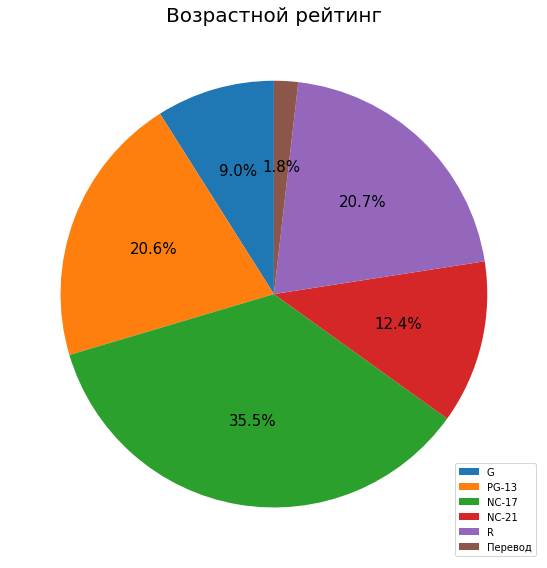

In [27]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_title("Возрастной рейтинг", fontsize=20)
patches, texts,  autotexts = plt.pie(c.values(), startangle=90, autopct='%1.1f%%')
plt.legend(patches, c.keys(), loc="best")
plt.setp(autotexts, size=15)
plt.tight_layout()
plt.show()

Видно, что больше всего фанфиков написано с ограничением NC-17, а переводы имеют меньшее кол-во. Скорее всего, часто писать в непопулярной у читателей категории никто не будет, поэтому можно выдвинуть гипотезу о том, что среднее число лайков у NC-17 будет самым высоким среди других рейтингов, а у Переводов самым низким



Также, так как NC-21 категория немногочисленна, можно выдвинуть гипотезу о том, что теги 18+ имеют меньше популярность (число лайков и обсуждений), чем обычные теги.

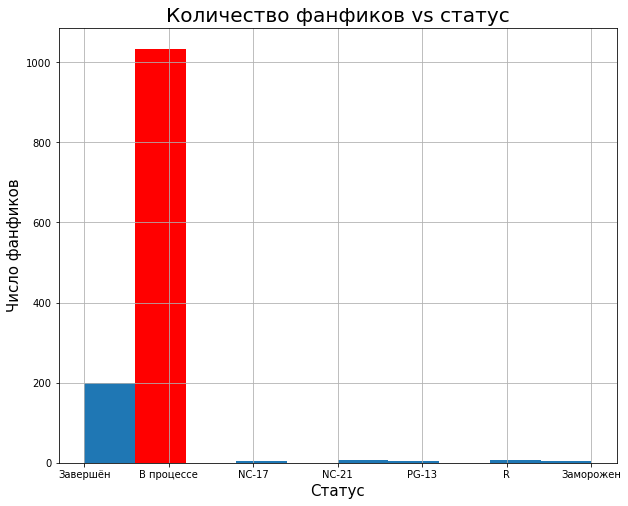

In [28]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_title("Количество фанфиков vs статус", fontsize=20)
ax.set_xlabel('Статус',  fontsize=15)
ax.set_ylabel('Число фанфиков',  fontsize=15)
n, bins, patches1 = ax.hist(df["Статус"])
patches1[1].set_fc("red")
plt.grid()
plt.show()

Здесь можно заметить, что в графу статус попали возрастные ограничения. Скорее всего, причина в том, что на сайте есть ошибки. Поэтому нужно дополнительно отфильтровать. Это повод выдвинуть гипотезу о том, что у фанфиков с ошибкой в описании есть другие ошибки -> не валидные описания 


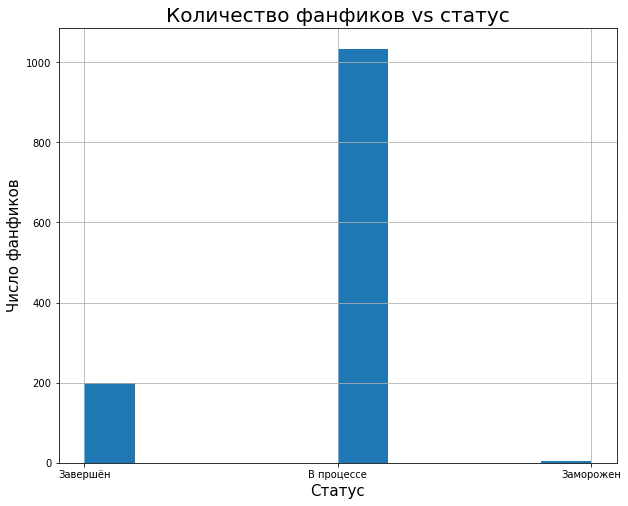

In [29]:
fig, ax = plt.subplots(figsize=[10,8])
ax.set_title("Количество фанфиков vs статус", fontsize=20)
ax.set_xlabel('Статус',  fontsize=15)
ax.set_ylabel('Число фанфиков',  fontsize=15)
needed = df.loc[(df["Статус"] == "Завершён") | (df["Статус"]=="В процессе")  | (df["Статус"]=="Заморожен")]
n, bins, patches1 = ax.hist(needed["Статус"])
plt.grid()
plt.show()

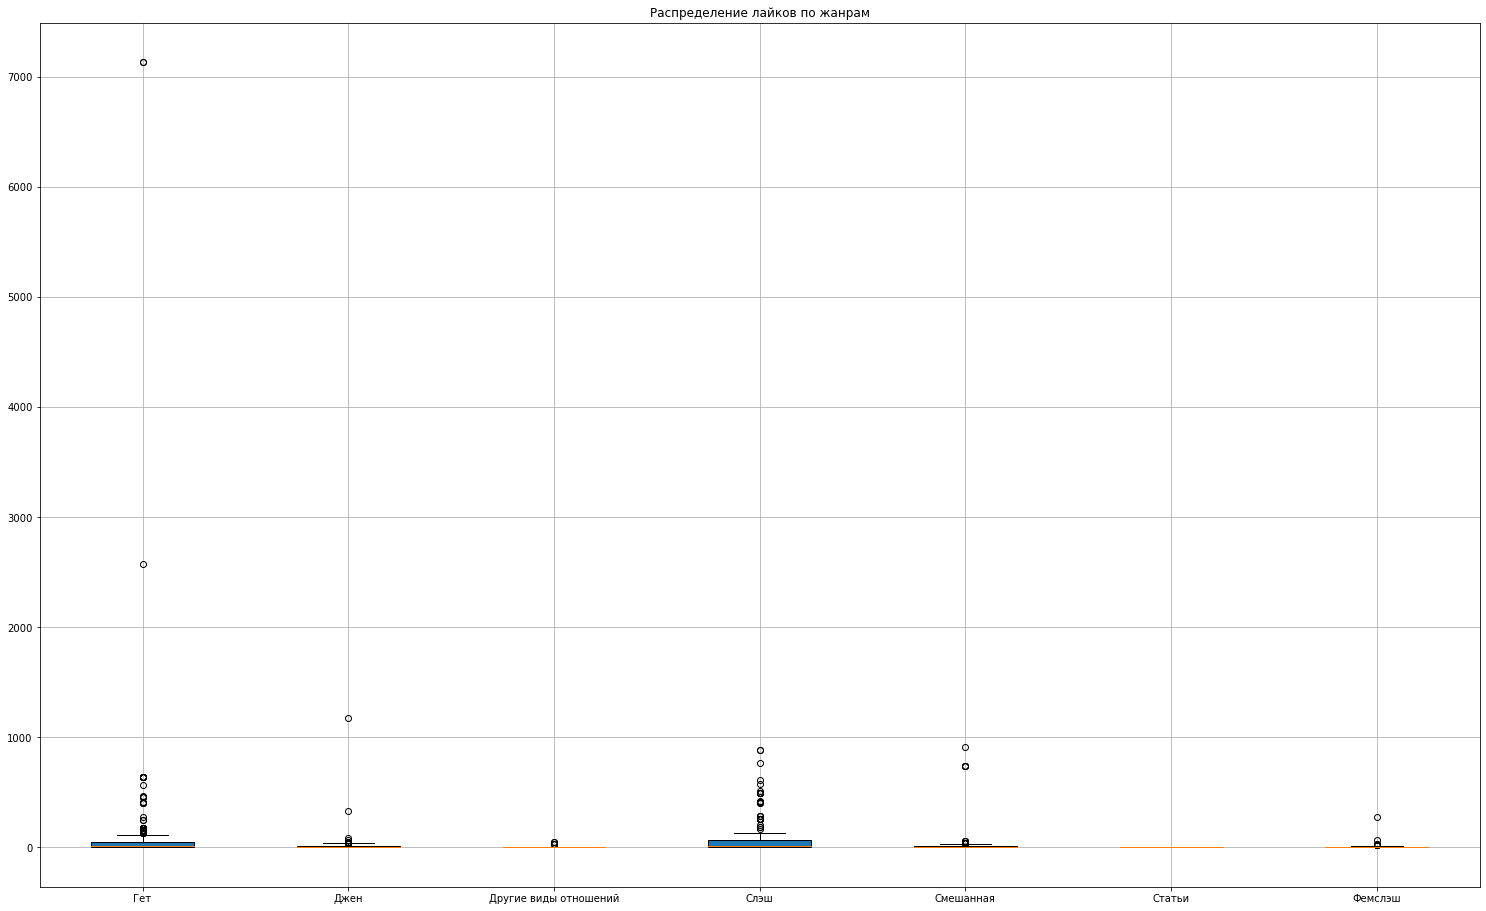

In [30]:
fig = plt.figure(figsize =(20, 12)) 

ax = fig.add_axes([0, 0, 1, 1]) 
plt.title("Распределение лайков по жанрам")
ax = plt.boxplot([df.loc[df["Жанр"]==genre]["Лайки"] for genre in np.unique(df["Жанр"])], 
                 patch_artist=True, labels=np.unique(df["Жанр"]))
plt.grid()
plt.show()

По распределению видно, что большая часть произведений имеет маленькое число лайков, но встречаются и выбросы. Самый значительный выброс в жанре Гет. Можно выдвинуть гипотезу, что по Отзывам и Добавлениям в списки будет та же картина, так как фанфики, создавшие определенный информационный шум и собравшие лайки, скорее всего, обсуждаются и добавляются в списки любимого.

In [31]:
df.loc[df["Лайки"] == df["Лайки"].max()]


,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %","Отношение кол-ва тегов 18+ к кол-ву всех тегов,%",Однополые отношения
186,Скованные/Manacled,"[Роулинг Джоан «Гарри Поттер», Гарри Поттер]","[Ekaterina Dunenkova, Agrafina, MrsRay]",[Гермиона Грейнджер/Драко Малфой],Гет,"[AU, Hurt/Comfort, Ангст, Антиутопия, Беременн...","[Изнасилование, Рейтинг за насилие / Рейтинг з...",Перевод,NC-21,7133,2678,2956,"планируется Макси, написано ...","Гарри Поттер мертв. \r\nПосле окончания войны,...",Нет примечаний,Запрещено в любом виде,False,37.544,8.0,Не содержится
435,Скованные/Manacled,"[Роулинг Джоан «Гарри Поттер», Гарри Поттер]","[Ekaterina Dunenkova, Agrafina, MrsRay]",[Гермиона Грейнджер/Драко Малфой],Гет,"[AU, Hurt/Comfort, Ангст, Антиутопия, Беременн...","[Изнасилование, Рейтинг за насилие / Рейтинг з...",Перевод,NC-21,7133,2678,2956,"планируется Макси, написано ...","Гарри Поттер мертв. \r\nПосле окончания войны,...",Нет примечаний,Запрещено в любом виде,False,37.544,8.0,Не содержится


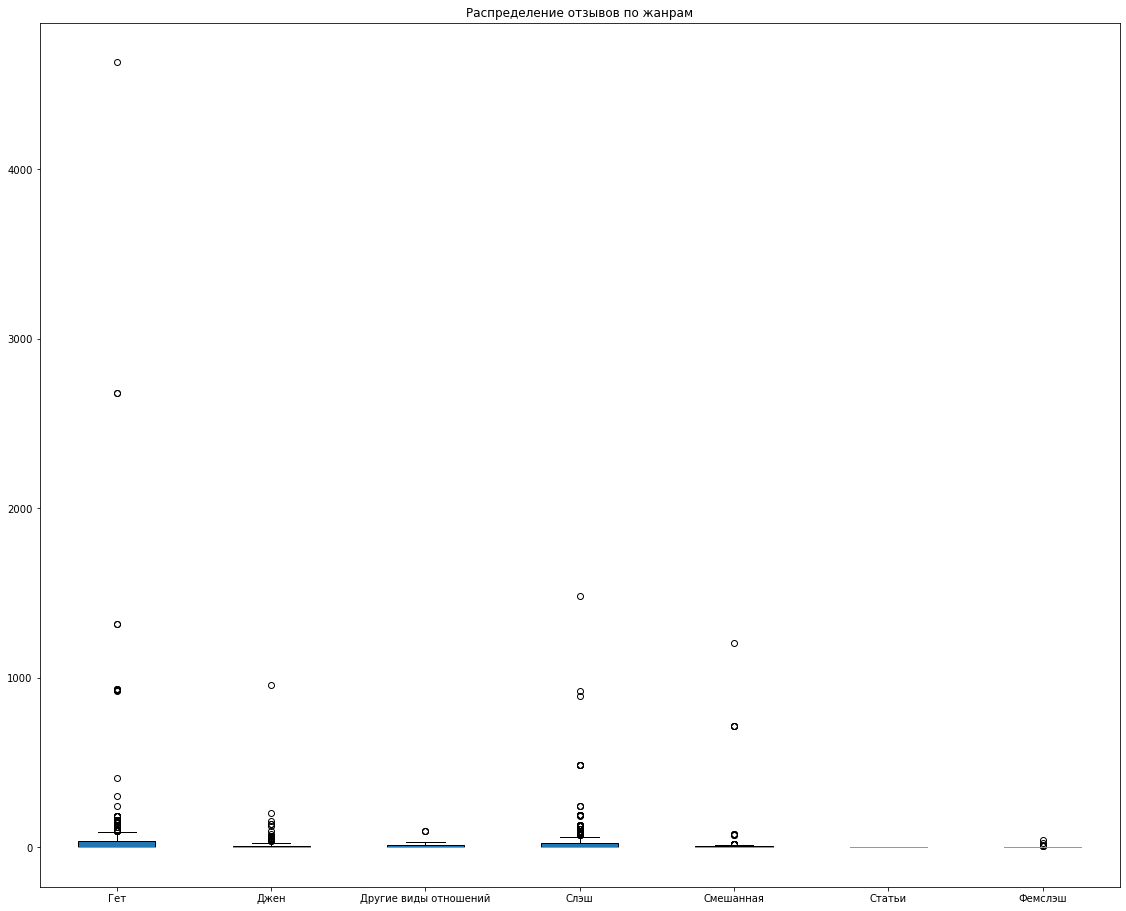

In [32]:
fig = plt.figure(figsize =(15, 12)) 
df["Отзывы"] = df["Отзывы"].apply(int)
ax = fig.add_axes([0, 0, 1, 1]) 
plt.title("Распределение отзывов по жанрам")
ax = plt.boxplot([df.loc[df["Жанр"]==genre]["Отзывы"] for genre in np.unique(df["Жанр"])], 
                 patch_artist=True, labels=np.unique(df["Жанр"]))
plt.show()

Картина похожа на лайки, но если говорить об отзывах, у жанра Гет выброс значительнее чем у Джена.

In [33]:
df.loc[df["Отзывы"] == df["Отзывы"].max()]


,Название,Фандомы,Автор,Пейринг и персонажи,Жанр,Все теги,Теги 18+,Возрастное ограничение,Статус,Лайки,Отзывы,В сборник,Размер,Описание,Примечания автора,Публикация на других ресурсах,Горячая работа,"Отношение кол-ва отзывов к кол-ву лайков, %","Отношение кол-ва тегов 18+ к кол-ву всех тегов,%",Однополые отношения
810,Какая бывает любовь.,"[Закрытая школа, Чёрная Лагуна]",[Карпе омниус],[],Гет,"[AU, Hurt/Comfort, Underage, UST, Ангст, Берем...","[Underage, Жестокость, Изнасилование, Инцест, ...",NC-21,В процессе,273,4633,43,"планируется Макси, написано ...",История о жизни обычных ребят из школы-пансион...,"Некоторые главы интереснее читать под музыку, ...",Запрещено в любом виде,False,1697.07,20.689655,Не содержится


In [ ]:
fig = plt.figure(figsize =(15, 12)) 
df["В сборник"] = df["В сборник"].apply(int)
ax = fig.add_axes([0, 0, 1, 1]) 
plt.title("Распределение отзывов по жанрам")
ax = plt.boxplot([df.loc[df["Жанр"]==genre]["В сборник"] for genre in np.unique(df["Жанр"])], 
                 patch_artist=True, labels=np.unique(df["Жанр"]))
plt.show()

In [ ]:
df.loc[df["В сборник"] == df["В сборник"].max()]


А вот для нахождения в сборниках и лайках картина одинакова. В топах одни и те же произведения

In [ ]:
fig = plt.figure(figsize =(10, 7)) 

ax = fig.add_axes([0, 0, 1, 1]) 
plt.bar(np.arange(len(np.unique(df["Жанр"]))), df.groupby(by="Жанр")["В сборник"].sum().reset_index()["В сборник"])
plt.xticks(np.arange(len(np.unique(df["Жанр"]))), np.unique(df["Жанр"]))
plt.title("Сколько пользователей добавили произведение в сборник. Разбиение по жанру")
plt.grid()
plt.show()


В сборниках у пользователей преобладате Джен, что очевидно из прошлого графика

## Задание 5

Проверим первую гипотезу из задания 4.

In [ ]:
df.groupby("Возрастное ограничение")["Лайки"].describe()

Гипотеза не подтвердилась, у Переводов среднее число лайков оказалось самым большим. Это можно объяснить наличием выбросов (максимальное число лайков для произведений в этой категории намного выше чем в других категория + оно **намного** выше чем значение в 75% персентиле) <br>Однако наличие перевода в списке возрастных ограничений вызывает сомнения

Проверяем гипотезу о тегах

In [ ]:
# Будем считать, что основной тег это тот, который указан первым
groups = df.groupby(by=lambda x: df.iloc[x]["Все теги"][0])["Лайки"].sum().reset_index()
groups["Лайки"].mean()

In [ ]:
# Будем считать, что основной тег это тот, который указан первым
groups = df.groupby(by=lambda x: df.iloc[x]["Все теги"][0])["Отзывы"].sum().reset_index()
groups["Отзывы"].mean()

In [ ]:
groups = df.groupby(by=lambda x: tuple(df.iloc[x]["Теги 18+"]) if len(tuple(df.iloc[x]["Теги 18+"]))>0 else ("N", ))["Лайки"].sum()
groups = groups.reset_index()
groups = groups.loc[groups['index'] != ("N",)]

groups["Лайки"].mean()

In [ ]:
groups = df.groupby(by=lambda x: tuple(df.iloc[x]["Теги 18+"]) if len(tuple(df.iloc[x]["Теги 18+"]))>0 else ("N", ))["Отзывы"].sum()
groups = groups.reset_index()
groups = groups.loc[groups['index'] != ("N",)]


groups["Отзывы"].mean()

Как оказалось, несмотря на то, что возрастная категория, которая может рассматриваться как 18+ не очень распространена, всреднем на произведения с тегами 18+ ставится больше лайков и пишется больше отзывов

In [ ]:
# Будем считать, что основной тег это тот, который указан первым
groups = df.groupby(by=lambda x: df.iloc[x]["Все теги"][0])["Лайки"].sum().reset_index()
groups.loc[groups["Лайки"] == groups["Лайки"].max()]

In [ ]:
groups = df.groupby(by=lambda x: tuple(df.iloc[x]["Теги 18+"]) if len(tuple(df.iloc[x]["Теги 18+"]))>0 else ("N", ))["Лайки"].sum()
groups = groups.reset_index()
groups = groups.loc[groups['index'] != ("N",)]

groups.loc[groups["Лайки"] == groups["Лайки"].max()]

Однако, если сравнить самые популярные теги, видно, что самый популярный тег 18+ имеет намного меньше лайков, чем самый популярный обычный тег. Скорее всего, разница в среднем результате появилась из-за того, что в категории Все теги слишком много произведений с низким кол-вом лайков.

Проверим гипотезу о невалидности данных.

In [ ]:
df.loc[(df["Статус"] == "G") | (df["Статус"]=="NC-17")  | (df["Статус"]=="R")]

Сомнения оправдались. Скорее всего, для переведенных произведений Статус и ограничение поменялись местами на сайте. Тогда прошлая гипотеза подтверждается, как и текущая